In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\vruxa\\Plant_based_project\\D_S\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 8404 files belonging to 9 classes.
['Potato__Early_blight', 'Potato__Late_blight', 'Potato__healthy', 'Tomato__Bacterial_spot', 'Tomato__Early_blight', 'Tomato__Late_blight', 'Tomato__Leaf_Mold', 'Tomato__Target_Spot', 'Tomato__healthy']


In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

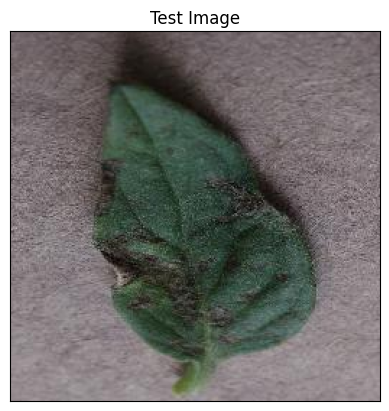

In [10]:
#Test Image Visualization
import cv2
image_path = 'C:\\Users\\vruxa\\Plant_based_project\\D_S\\test\\TomatoEarlyBlight6.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## test Model

In [11]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)
# predictions.shape

1/1 [==============================] - 0s 61ms/step


In [12]:

print(predictions)

[[1.09498922e-06 2.64537939e-05 9.62393756e-07 2.68770847e-04
  1.06355645e-01 6.22984197e-04 3.97536308e-02 8.52951825e-01
  1.86442830e-05]]


In [13]:

result_index = np.argmax(predictions) #Return index of max element
print(result_index)

7


In [14]:
class_name = ['Potato__Early_blight', 'Potato__Late_blight', 'Potato__healthy', 'Tomato__Bacterial_spot', 'Tomato__Early_blight', 'Tomato__Late_blight', 'Tomato__Leaf_Mold', 'Tomato__Target_Spot', 'Tomato__healthy']

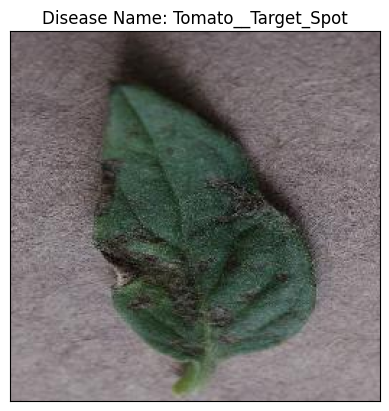

In [15]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()